**First : Data analysis**

**Features:**
* **instant:** record index
* **dteday :** date
* **season :** season (1:springer, 2:summer, 3:fall, 4:winter)
* **yr :** year (0: 2011, 1:2012)
* **mnth :** month ( 1 to 12)
* **hr :** hour (0 to 23)
* **holiday :** weather day is holiday or not
* **weekday :** day of the week
* **workingday :** if day is neither weekend nor holiday is 1, otherwise is 0.
* **weathersit :**
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light
          Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* **temp :** Normalized temperature in Celsius. The values are divided to 41 (max)
* **atemp:** Normalized feeling temperature in Celsius. The values are divided to 50 (max)
* **hum:** Normalized humidity. The values are divided to 100 (max)
* **windspeed:** Normalized wind speed. The values are divided to 67 (max)
* **casual:** count of casual users
* **registered:** count of registered users
* **cnt:** count of total rental bikes including both casual and registered
* **Experience:** experience rate (good , very good , excellent)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
file_path = '/content/Bikeday.csv'
df = pd.read_csv('/content/Bikeday.csv' , encoding='ISO-8859-1')
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr,Exper
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0,good
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,1,good
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2,good
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,3,good
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,4,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,15,excellent
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,16,excellent
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,17,excellent
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,18,excellent


In [3]:
df = pd.read_csv("/content/Bikeday.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr,Exper
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0,good
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,1,good
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2,good
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,3,good
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,4,good


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        728 non-null    float64
 10  atemp       728 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
 16  hr          731 non-null    int64  
 17  Exper       731 non-null    object 
dtypes: float64(4), int64(12), object(2)
memory usage: 102.9+ KB


In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,728.000000,728.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495551,0.474333,0.627894,0.190486,848.176471,3656.172367,4504.348837,11.805746
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183285,0.163289,0.142429,0.077498,686.622488,1560.256377,1937.211452,6.859492
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,0.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.336458,0.337628,0.520000,0.134950,315.500000,2497.000000,3152.000000,6.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.499167,0.485158,0.626667,0.180975,713.000000,3662.000000,4548.000000,12.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,0.609544,0.730209,0.233214,1096.000000,4776.500000,5956.000000,18.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,23.000000


In [6]:
df.duplicated().sum()

0

In [7]:
df.head(1)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr,Exper
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0,good


In [8]:
len(df.cnt.unique())

696

**about my data:**
* There no duplicated values
* There is some missing values ; in (temp/atemp)
* Features i can drop: instant, dteday, holiday

In [10]:
df_missing = pd.read_csv("/content/Bikeday.csv")
df_missing

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr,Exper
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0,good
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,1,good
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2,good
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,3,good
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,4,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,15,excellent
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,16,excellent
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,17,excellent
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,18,excellent


In [11]:
df_missing['atemp'].isnull().sum() , df_missing['temp'].isnull().sum()

(3, 3)

In [12]:
mean_temp = df_missing['temp'].mean()
df_missing['temp'].fillna(mean_temp, inplace=True)

In [13]:
mean_atemp = df_missing['atemp'].mean()
df_missing['atemp'].fillna(mean_atemp, inplace=True)

In [14]:
df_missing['atemp'].isnull().sum() , df_missing['temp'].isnull().sum()

(0, 0)

In [15]:
numerical_df = df.select_dtypes(include=['number'])
numerical_df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,1
2,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2
3,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,3
4,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,4


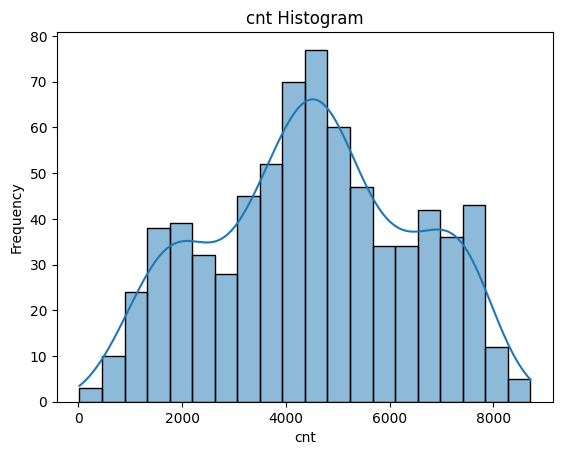

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df['cnt'], bins=20, kde=True)
plt.xlabel('cnt')
plt.ylabel('Frequency')
plt.title('cnt Histogram')
plt.show()

<Axes: xlabel='cnt'>

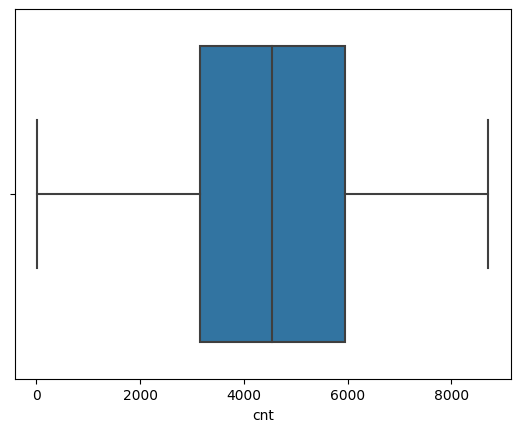

In [17]:
sns.boxplot(x=df['cnt'])

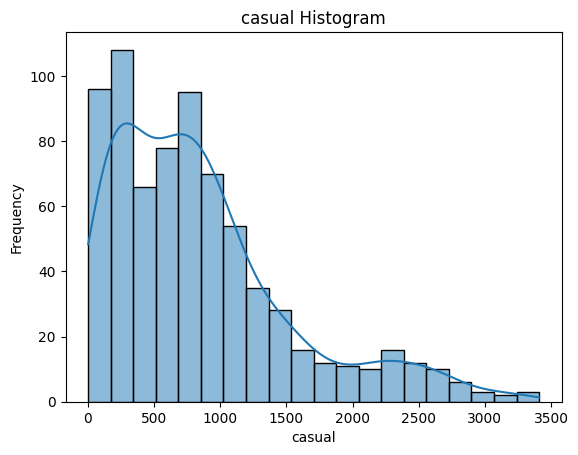

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df['casual'], bins=20, kde=True)
plt.xlabel('casual')
plt.ylabel('Frequency')
plt.title('casual Histogram')
plt.show()

<Axes: xlabel='casual'>

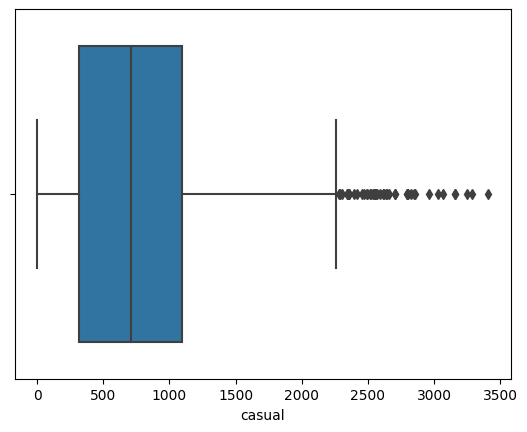

In [19]:
sns.boxplot(x=df['casual'])

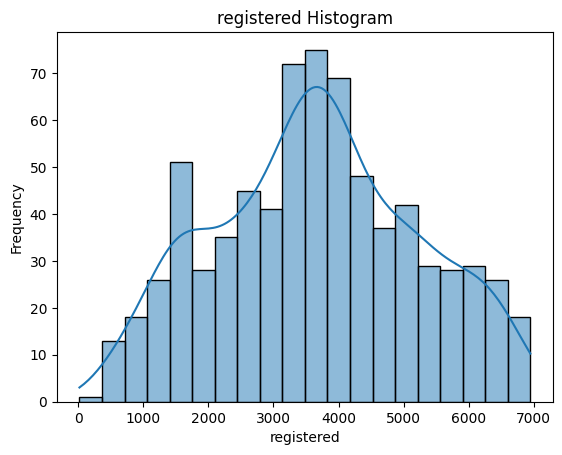

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df['registered'], bins=20, kde=True)
plt.xlabel('registered')
plt.ylabel('Frequency')
plt.title('registered Histogram')
plt.show()

<Axes: xlabel='registered'>

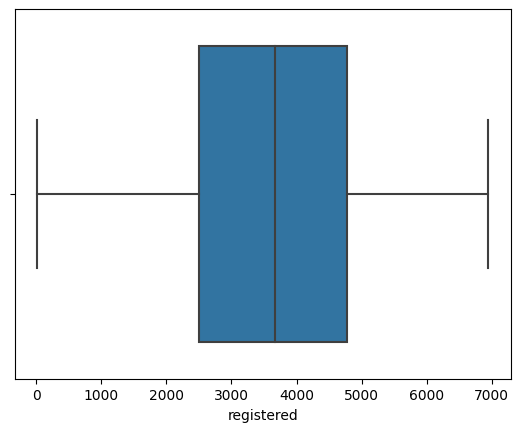

In [21]:
sns.boxplot(x=df['registered'])

In [22]:
correlation = df['casual']

In [23]:
correlation

0      331
1      131
2      120
3      108
4       82
      ... 
726    247
727    644
728    159
729    364
730    439
Name: casual, Length: 731, dtype: int64

**about my numerical data:**

* The cnt have some problems in the values distribution
* The casual have a lot of outliers

**categorical:**

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        728 non-null    float64
 10  atemp       728 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
 16  hr          731 non-null    int64  
 17  Exper       731 non-null    object 
dtypes: float64(4), int64(12), object(2)
memory usage: 102.9+ KB


In [25]:
categorical_df = df.select_dtypes(include=['object'])
categorical_df["Exper"] = df["Exper"]
categorical_df["dteday"] = df["dteday"]
categorical_df

,dteday,Exper
0,1/1/2011,good
1,1/2/2011,good
2,1/3/2011,good
3,1/4/2011,good
4,1/5/2011,good
...,...,...
726,12/27/2012,excellent
727,12/28/2012,excellent
728,12/29/2012,excellent
729,12/30/2012,excellent


In [26]:
for column in categorical_df.columns:
    print(f"Value counts for {column}:")
    print(categorical_df[column].value_counts())
    print('---' * 10)

Value counts for dteday:
1/1/2011      1
4/25/2012     1
4/27/2012     1
4/28/2012     1
4/29/2012     1
             ..
9/3/2011      1
9/4/2011      1
9/5/2011      1
9/6/2011      1
12/31/2012    1
Name: dteday, Length: 731, dtype: int64
------------------------------
Value counts for Exper:
very good    376
excellent    206
good         149
Name: Exper, dtype: int64
------------------------------


In [27]:
len(categorical_df['Exper'].unique())

3

In [28]:
len(categorical_df['dteday'].unique())

731

**Data analysis (Reports):**

In [29]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr,Exper
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0,good
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,1,good
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2,good
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,3,good
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,4,good


In [30]:
import plotly.express as px
ct = pd.crosstab(df['season'], df['holiday'])
ct.reset_index(inplace=True)
melted_ct = pd.melt(ct, id_vars='season', value_vars=[0, 1],
                    var_name='holiday', value_name='Count')
fig = px.bar(melted_ct, x='season', y='Count',
             color='holiday', title='holiday by season',
             labels={'season': 'season', 'Count': 'Number of days'},
             text='Count')
fig.show()

In [31]:
import plotly.express as px
ct = pd.crosstab(df['season'], df['weekday'])
ct.reset_index(inplace=True)
melted_ct = pd.melt(ct, id_vars='season', value_vars=[0, 1],
                    var_name='weekday', value_name='Count')
fig = px.bar(melted_ct, x='season', y='Count',
             color='weekday', title='weekday by season',
             labels={'season': 'season', 'Count': 'Number of days'},
             text='Count')
fig.show()

In [32]:
fig = px.histogram(df, x="hr", color="Exper",
                   barmode="overlay", nbins=30,
                   labels={'hr': 'hr', 'count': '-'},
                   title='Exper by hr')
fig.write_html("-")
fig.show()

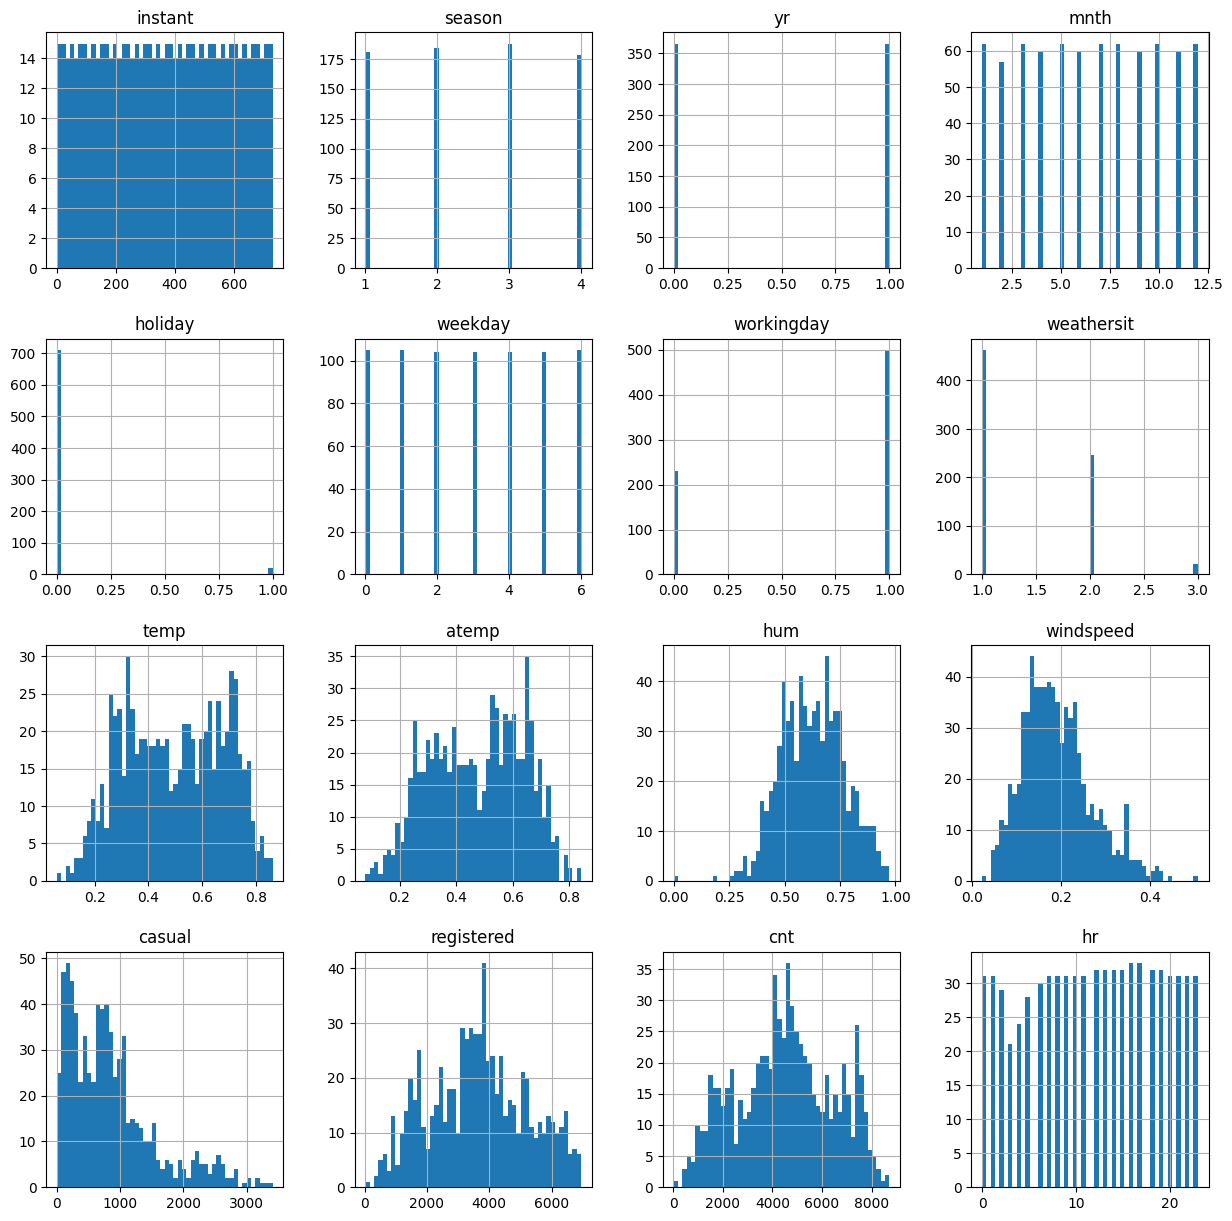

In [33]:
df.hist(figsize=(15,15), bins=50)
plt.show()

In [34]:
Exper_counts = df['Exper'].value_counts()

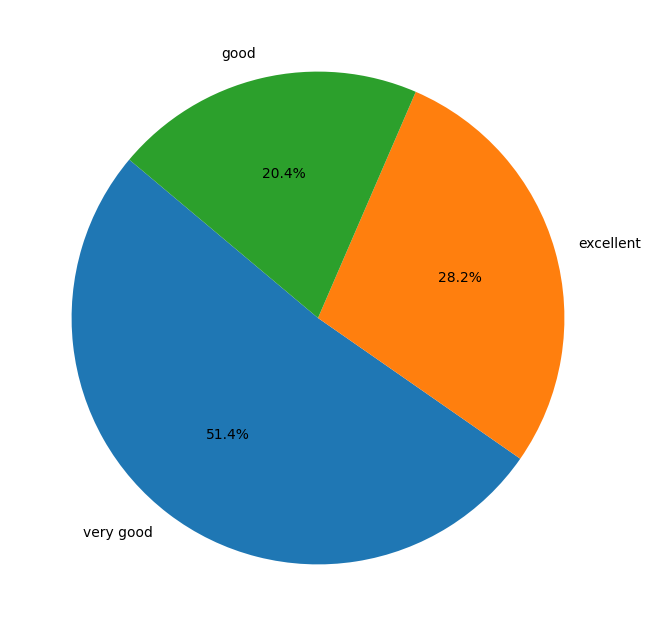

In [35]:
import matplotlib.pyplot as plt

Exper_counts = df['Exper'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(Exper_counts, labels=Exper_counts.index, autopct='%1.1f%%', startangle=140)
plt.show()

**about my data (Results):**
* There is some missing values / Solved ✔
* There is some Outliers / Solved ✔
* There no duplicated values
* Features i can drop: instant, dteday
* according to the Numerical DA; cnt and casual have some problems and closes values

In [36]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr,Exper
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0,good
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,1,good
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2,good
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,3,good
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,4,good


In [37]:
df.drop(columns=['instant','dteday'],inplace=True,axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr,Exper
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0,good
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,1,good
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2,good
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,3,good
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,4,good


In [38]:
df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          3
atemp         3
hum           0
windspeed     0
casual        0
registered    0
cnt           0
hr            0
Exper         0
dtype: int64

In [39]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_median_temp = train_df['temp'].median()
train_median_atemp = train_df['atemp'].median()
train_df['temp'].fillna(train_median_temp, inplace=True)
train_df['atemp'].fillna(train_median_atemp, inplace=True)
test_df['temp'].fillna(train_median_temp, inplace=True)
test_df['atemp'].fillna(train_median_atemp, inplace=True)

In [40]:
train_df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
hr            0
Exper         0
dtype: int64

*season, workingday,	weekday, weathersit -> label encoding

*hr, Exper-> One Hot Encoding

In [41]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [42]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

le = LabelEncoder()
label_cols = ['weathersit', 'weekday', 'workingday', 'season']

for col in label_cols:
    le.fit(train_df[col])
    train_df[col] = le.transform(train_df[col])
    test_df[col] = le.transform(test_df[col])

onehot_cols = ['Exper']

train_df_onehot = pd.get_dummies(train_df, columns=onehot_cols)
test_df_onehot = pd.get_dummies(test_df, columns=onehot_cols)

In [43]:
train_df_onehot.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr,Exper_excellent,Exper_good,Exper_very good
682,3,1,11,0,2,1,1,0.343333,0.323225,0.662917,0.342046,327,3767,4094,18,1,0,0
250,2,0,9,0,4,1,2,0.633913,0.555361,0.939565,0.192748,153,1689,1842,19,0,1,0
336,3,0,12,0,6,0,0,0.299167,0.310604,0.612917,0.095783,706,2908,3614,12,0,0,1
260,2,0,9,0,0,0,0,0.507500,0.490537,0.695000,0.178483,1353,2921,4274,7,0,0,1
543,2,1,6,0,3,1,0,0.697500,0.640792,0.360000,0.271775,1077,6258,7335,19,0,0,1


Scaling Data:

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale_cols = ['temp', 'atemp','hum']
scaler.fit(train_df_onehot[scale_cols])
train_df_onehot[scale_cols] = scaler.transform(train_df_onehot[scale_cols])
test_df_onehot[scale_cols] = scaler.transform(test_df_onehot[scale_cols])

In [45]:
train_df_onehot

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,hr,Exper_excellent,Exper_good,Exper_very good
682,3,1,11,0,2,1,1,0.354130,0.320487,0.688745,0.342046,327,3767,4094,18,1,0,0
250,2,0,9,0,4,1,2,0.716207,0.625197,0.976171,0.192748,153,1689,1842,19,0,1,0
336,3,0,12,0,6,0,0,0.299097,0.303920,0.636797,0.095783,706,2908,3614,12,0,0,1
260,2,0,9,0,0,0,0,0.558691,0.540107,0.722078,0.178483,1353,2921,4274,7,0,0,1
543,2,1,6,0,3,1,0,0.795440,0.737336,0.374026,0.271775,1077,6258,7335,19,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,0,3,0,0,0,0,0.405237,0.395131,0.547939,0.270604,982,1435,2417,2,0,1,0
106,1,0,4,0,0,0,0,0.495350,0.558309,0.498268,0.303496,1558,2186,3744,15,0,0,1
270,3,0,9,0,3,1,1,0.717562,0.651183,0.881818,0.148629,480,3427,3907,17,0,0,1
435,0,1,3,0,0,0,0,0.377065,0.368326,0.495540,0.222587,1658,3253,4911,4,0,0,1


In [46]:
X_train = train_df_onehot.drop('yr', axis=1)
y_train = train_df_onehot['yr']
X_test = test_df_onehot.drop('yr', axis=1)
y_test = test_df_onehot['yr']

In [47]:
print(y_train.head())

682    1
250    0
336    0
260    0
543    1
Name: yr, dtype: int64


> **Build my model:**

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

> **Linear Regression:**

In [49]:
linear_reg = LinearRegression()
svr_reg = SVR()
dt_reg = DecisionTreeRegressor()
knn_reg = KNeighborsRegressor(n_neighbors=5)

> **Fit the models on the training data:**

In [50]:
linear_reg.fit(X_train, y_train)
svr_reg.fit(X_train, y_train)
dt_reg.fit(X_train, y_train)
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

> **Make predictions:**

In [51]:
linear_pred = linear_reg.predict(X_test)
svr_pred = svr_reg.predict(X_test)
dt_pred = dt_reg.predict(X_test)
knn_pred = knn_reg.predict(X_test)

> **Evaluate:**

In [52]:
def evaluate_model(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{name} - MSE: {mse}, R-squared: {r2}")

evaluate_model("Linear Regression", y_test, linear_pred)
evaluate_model("SVR", y_test, svr_pred)
evaluate_model("Decision Tree Regressor", y_test, dt_pred)
evaluate_model("KNN Regressor", y_test, knn_pred)

Linear Regression - MSE: 0.06924923114199472, R-squared: 0.718296943571656
SVR - MSE: 0.12163043779223927, R-squared: 0.5052123248771652
Decision Tree Regressor - MSE: 0.027210884353741496, R-squared: 0.8893072289156626
KNN Regressor - MSE: 0.11047619047619049, R-squared: 0.5505873493975904


In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
# (MBE)
def calculate_mbe(y_true, y_pred):
    return np.mean(y_true - y_pred)

mbe_linear = calculate_mbe(y_test, linear_pred)
mbe_svr = calculate_mbe(y_test, svr_pred)
mbe_dt = calculate_mbe(y_test, dt_pred)
mbe_knn = calculate_mbe(y_test, knn_pred)

# (MAE)
mae_linear = mean_absolute_error(y_test, linear_pred)
mae_svr = mean_absolute_error(y_test, svr_pred)
mae_dt = mean_absolute_error(y_test, dt_pred)
mae_knn = mean_absolute_error(y_test, knn_pred)

# (MSE)
mse_linear = mean_squared_error(y_test, linear_pred)
mse_svr = mean_squared_error(y_test, svr_pred)
mse_dt = mean_squared_error(y_test, dt_pred)
mse_knn = mean_squared_error(y_test, knn_pred)

# (RMSE)
rmse_linear = np.sqrt(mse_linear)
rmse_svr = np.sqrt(mse_svr)
rmse_dt = np.sqrt(mse_dt)
rmse_knn = np.sqrt(mse_knn)

# (R2)
r2_linear = r2_score(y_test, linear_pred)
r2_svr = r2_score(y_test, svr_pred)
r2_dt = r2_score(y_test, dt_pred)
r2_knn = r2_score(y_test, knn_pred)

print("(MBE):")
print(f"Linear Regression: {mbe_linear}")
print(f"SVR: {mbe_svr}")
print(f"Decision Tree Regressor: {mbe_dt}")
print(f"KNN Regressor: {mbe_knn}")

print("\n(MAE):")
print(f"Linear Regression: {mae_linear}")
print(f"SVR: {mae_svr}")
print(f"Decision Tree Regressor: {mae_dt}")
print(f"KNN Regressor: {mae_knn}")

print("\n(MSE):")
print(f"Linear Regression: {mse_linear}")
print(f"SVR: {mse_svr}")
print(f"Decision Tree Regressor: {mse_dt}")
print(f"KNN Regressor: {mse_knn}")

print("\n(RMSE):")
print(f"Linear Regression: {rmse_linear}")
print(f"SVR: {rmse_svr}")
print(f"Decision Tree Regressor: {rmse_dt}")
print(f"KNN Regressor: {rmse_knn}")

print("\n(R2):")
print(f"Linear Regression: {r2_linear}")
print(f"SVR: {r2_svr}")
print(f"Decision Tree Regressor: {r2_dt}")
print(f"KNN Regressor: {r2_knn}")

(MBE):
Linear Regression: 0.0005751079095044059
SVR: 0.03170988852536581
Decision Tree Regressor: 0.0
KNN Regressor: -0.07346938775510203

(MAE):
Linear Regression: 0.19441883917047836
SVR: 0.23010655650550144
Decision Tree Regressor: 0.027210884353741496
KNN Regressor: 0.20136054421768707

(MSE):
Linear Regression: 0.06924923114199472
SVR: 0.12163043779223927
Decision Tree Regressor: 0.027210884353741496
KNN Regressor: 0.11047619047619049

(RMSE):
Linear Regression: 0.2631524864826375
SVR: 0.34875555593028085
Decision Tree Regressor: 0.1649572197684645
KNN Regressor: 0.33237958793552663

(R2):
Linear Regression: 0.718296943571656
SVR: 0.5052123248771652
Decision Tree Regressor: 0.8893072289156626
KNN Regressor: 0.5505873493975904


>**Enhance:** + **pipeline**

In [58]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [63]:
median_age =df['temp'].median()
median_fare = df['atemp'].median()
df['temp'].fillna(median_age, inplace=True)
df['atemp'].fillna(median_fare, inplace=True)
mode_Embarked = df['Exper'].mode()[0]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label_cols = ['weathersit', 'weekday', 'workingday', 'season']
for col in label_cols:
    le.fit(df[col])
    df[col] = le.transform(df[col])
onehot_cols = ['Exper']
df_onehot = pd.get_dummies(df, columns=onehot_cols)

> **Scaler -> min max scaler**

In [64]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale_cols = ['temp', 'atemp']
scaler.fit(df_onehot[scale_cols])
df_onehot[scale_cols] = scaler.transform(df_onehot[scale_cols])

In [79]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
data = pd.read_csv('/content/Bikeday.test.csv')
X = data.drop(['instant', 'dteday', 'cnt'], axis=1)
y = data['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
numeric_features = ['temp', 'atemp']
categorical_features = ['weathersit', 'weekday', 'workingday', 'season']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformers = []
for cat_col in categorical_features:
    cat_transformer = Pipeline(steps=[
        ('encoder', LabelEncoder())
    ])
    categorical_transformers.append((cat_col, cat_transformer, [cat_col]))
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', 'passthrough', categorical_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', SVR())])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("SVR with Data Preprocessing MSE:", mse)
print("SVR with Data Preprocessing R-squared:", r2)


SVR with Data Preprocessing MSE: 3984830.5159611353
SVR with Data Preprocessing R-squared: 0.00624750823575293


In [80]:
df = pd.read_csv("/content/Bikeday.csv")

In [82]:
df.drop(columns='yr',axis=1,inplace=True)

In [86]:
pipeline.fit(X_train, y_train)
X = df.drop(['instant', 'dteday', 'cnt'], axis=1)
y = df['cnt']
X_transformed = pipeline.named_steps['preprocessor'].transform(X)

In [89]:
X_transformed

array([[-0.8625621 , -0.71220853,  2.        ,  6.        ,  0.        ,
         1.        ],
       [-0.75599737, -0.77341029,  2.        ,  0.        ,  0.        ,
         1.        ],
       [-1.67818984, -1.79076111,  1.        ,  1.        ,  1.        ,
         1.        ],
       ...,
       [-1.36381532, -1.46268228,  2.        ,  6.        ,  0.        ,
         1.        ],
       [-1.35001946, -1.52892331,  1.        ,  0.        ,  0.        ,
         1.        ],
       [-1.57075321, -1.57976794,  2.        ,  1.        ,  1.        ,
         1.        ]])

In [94]:
y_pred_train = pipeline.predict(X)

In [100]:
pipeline.fit(X, y)
y_pred_train = pipeline.predict(X)
if 'yr' in X.columns:
    X.drop(columns='yr', axis=1, inplace=True)
y_pred_X = pipeline.predict(X)

In [101]:
import joblib
joblib.dump(pipeline, 'trained_pipeline.pkl')

['trained_pipeline.pkl']

In [103]:
loaded_pipeline = joblib.load('trained_pipeline.pkl')
if 'yr' in X.columns:
    X.drop(columns='Survived', axis=1, inplace=True)
y_pred_X_loaded = loaded_pipeline.predict(X)